In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

### Definition 1

Given probability density functions $p_1, p_2,\ldots p_n$ and weights $w_1, w_2,\ldots w_n$ where $w_i \geq 0$ and

$$
\sum_{i=1}^{n}w_i = 1,
$$

mixture probability density function $f$ is defined as

$$
f(x) = \sum_{i=1}^{n}w_i p_i(x)
$$

In [43]:
# 3 gaussians with means = 2, 10, 18 and var = 2 and equal weights = [1 / 3] * 3

def f(x):
    means = [5, 10, 15]
    w = 1 / 3
    return np.sum([w * norm.pdf(x, mean, 2) for mean in means])

f = np.vectorize(f)

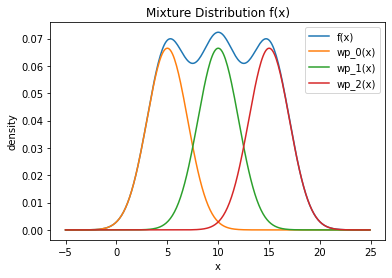

In [44]:
x = np.arange(-5, 25, 0.1)

plt.plot(x, f(x), label='f(x)')

for i, m in enumerate([5, 10, 15]):
    plt.plot(x, 1 / 3 * norm.pdf(x, m, 2), label=f'wp_{i}(x)')

plt.title('Mixture Distribution f(x)')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()

plt.show()

### Definition 2
On each trial, multinoulli distribution over the mixture components
determines which component is used to generate the sample

$$
f(x) = \sum_{i=i}^{n}P(c=i)p(x|c=i) 
$$

where $P(c)$ is the multinoulli distribution over the components.
This is equivalent to the first definition, $P(c)$ gives the component weight (probability mass)
and $p(x|c=i)$ gives the density of the component for given $x$.

In [45]:
# 3 gaussians with means = 0, 10, 20 and var = 2 and equal weights = [1 / 3] * 3

def rand_mixture(size):
    
    def get_sample():
        # component is defined by the mean only
        # each component has the same weight (same probability)  
        mean = np.random.choice([2, 10, 18])
        return 2 * np.random.randn() + mean

    return np.array([get_sample() for _ in range(size)])

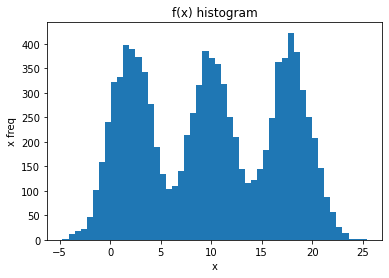

In [53]:
x = rand_mixture(10000)

plt.hist(x, bins=50)
plt.title('f(x) histogram')
plt.xlabel('x')
plt.ylabel('x freq')
plt.show()